**Задача: "Прогнозирование стоимости домов с использованием модели регрессии и
сохранение/загрузка модели в scikit-learn"**

**Описание задачи:** Построить модель регрессии для прогнозирования стоимости домов на
основе набора данных и использовать возможности сохранения и загрузки модели в
библиотеке scikit-learn

In [2]:
import pandas as pd
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных:

MedInc: Средний доход на домохозяйство в районе.

HouseAge: Средний возраст домов в районе.

AveRooms: Среднее количество комнат в доме.

AveBedrms: Среднее количество спален в доме.

Population: Население района.

AveOccup: Среднее количество членов домохозяйства.

Latitude: Широта района (координата).

Target:

Longitude: Долгота района (координата).

In [22]:
from sklearn.datasets import fetch_california_housing

# Загрузка данных
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)
data = pd.DataFrame(california.data, columns=california.feature_names)

# Проверка первых строк данных
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


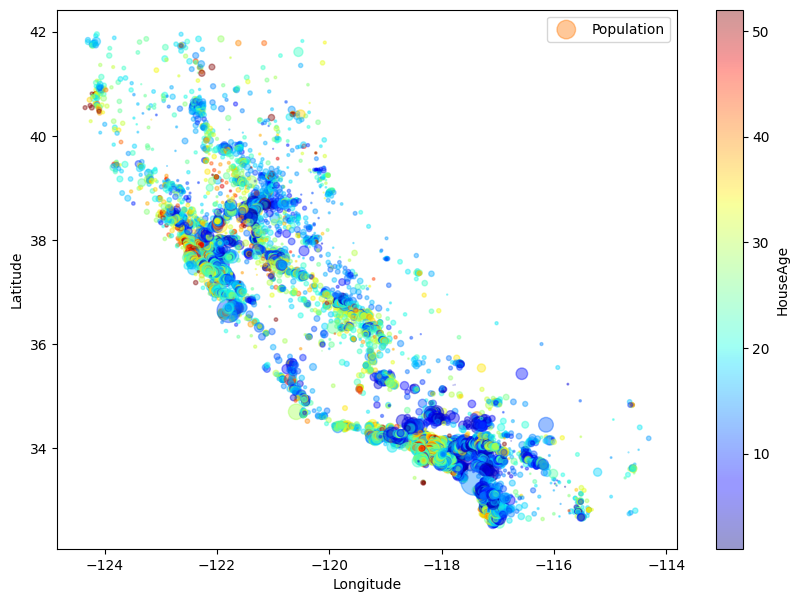

In [37]:
data.plot(
    # Longitude - долгота, Latitude - Широта
    kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=data["Population"]/100, label="Population", figsize=(10,7),
    c="HouseAge", cmap="jet", colorbar=True
)
plt.legend()
plt.show()

В этом датасете можно увеличить количество столбцов, для улучшения предсказаний(увеличить выборку, удалить столбцы с низкой корреляцией)

Подробнее - [Обработка california_housing_dataset](https://github.com/Antonoof/TensorFlow-Scikit-learn-Keras/blob/main/1.%20Regression%20Машинное%20обучение%20scikit-learn%20%2B%20Keras%20%2B%20TensorFlow.ipynb)

# Предобработка данных

In [10]:
# Проверка на пропущенные значения
print(X.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [11]:
# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание модели регрессии

In [12]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели

In [13]:
# Обучение модели
model.fit(X_train, y_train)

LinearRegression()

# Оценка производительности модели

In [14]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 0.5332001304956565
MSE: 0.555891598695244
R^2: 0.5757877060324511


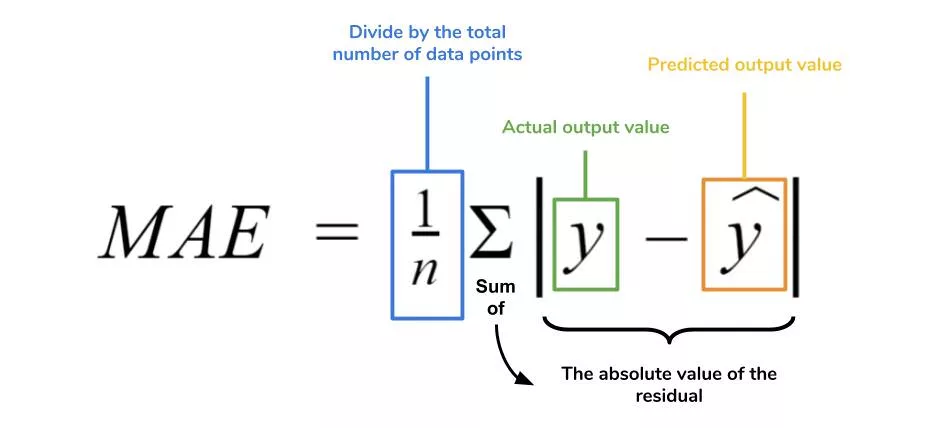

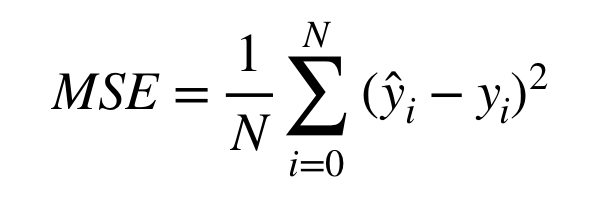

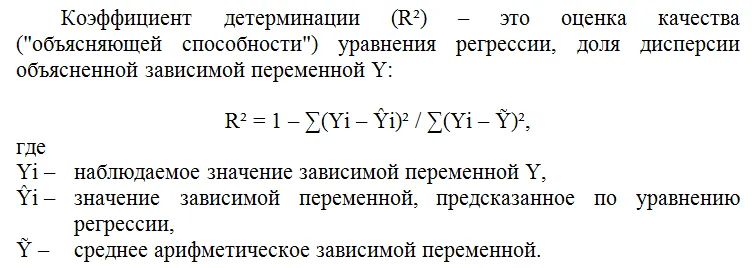

**R^2 отрицательный, если модель предсказывает хуже чем среднее значение целевой переменной**

# Сохранение модели

In [15]:
# Сохранение модели
joblib.dump(model, 'model.pkl')

['house_price_model.pkl']

# Загрузка модели

In [16]:
# Загрузка модели
loaded_model = joblib.load('model.pkl')

# Предсказание с использованием загруженной модели

In [17]:
# Предсказание с использованием загруженной модели
y_pred_loaded = loaded_model.predict(X_test)

# Оценка загруженной модели
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print(f"MAE (loaded model): {mae_loaded}")
print(f"MSE (loaded model): {mse_loaded}")
print(f"R^2 (loaded model): {r2_loaded}")

MAE (loaded model): 0.5332001304956565
MSE (loaded model): 0.555891598695244
R^2 (loaded model): 0.5757877060324511


# Визуализация результатов

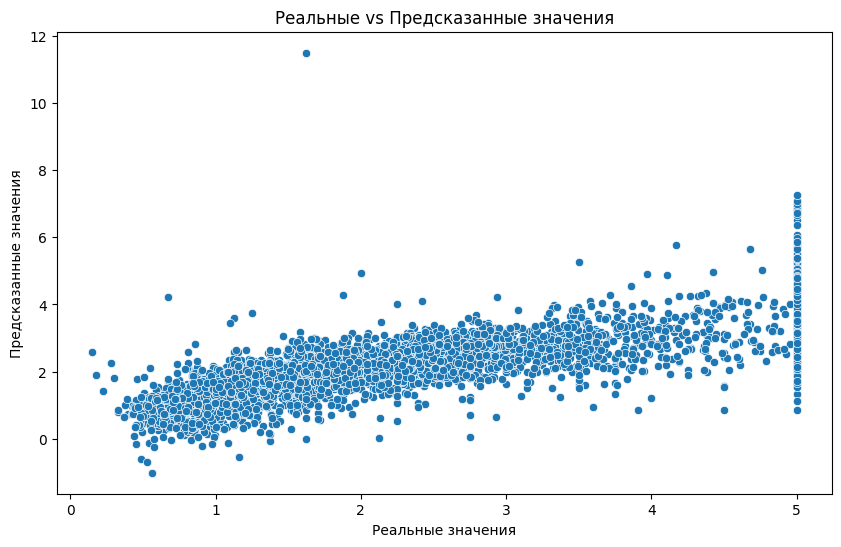

In [18]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_loaded)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs Предсказанные значения")
plt.show()

# Найдем лучший метод регресси для нашей задачи

In [38]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import BayesianRidge # Байесовская регрессия с регуляризацией
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor # Многослойный перцептрон
from sklearn.gaussian_process import GaussianProcessRegressor # Регрессия на основе гауссовских процессов

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Support Vector Regression": SVR(),
    "Multi-layer Perceptron Regressor": MLPRegressor(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Gaussian Process Regressor": GaussianProcessRegressor()
}

In [39]:
# Обучение и оценка моделей
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MAE={mae}, MSE={mse}, R^2={r2}")

Linear Regression: MAE=0.5332001304956565, MSE=0.555891598695244, R^2=0.5757877060324511
Ridge Regression: MAE=0.5331933646313113, MSE=0.5558512007367514, R^2=0.575818534544132
Lasso Regression: MAE=0.9060685490007149, MSE=1.3106960720039365, R^2=-0.00021908714592466794
Elastic Net: MAE=0.8054811214844755, MSE=1.0429810992343884, R^2=0.20407970599034497
Decision Tree Regressor: MAE=0.45253432412790695, MSE=0.49696759323568307, R^2=0.6207538245786326
Random Forest Regressor: MAE=0.3280675655523257, MSE=0.2549257381151406, R^2=0.805460934450133
Extra Trees Regressor: MAE=0.32679952453972877, MSE=0.2554729537867806, R^2=0.8050433429342578
Gradient Boosting Regressor: MAE=0.37170892371812675, MSE=0.29401783238716883, R^2=0.7756289545712209
AdaBoost Regressor: MAE=0.7073006182408591, MSE=0.6889760540972044, R^2=0.4742282252811716
K-Nearest Neighbors Regressor: MAE=0.4455250896317829, MSE=0.4338108260898032, R^2=0.6689500504856482
Support Vector Regression: MAE=0.3977630963437868, MSE=0.3551

Забыл указать max по оценкам(MAE+MSE -> min) and (R^2 -> MAX)

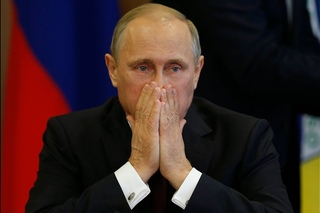

Random Forest Regressor на первый взгляд лучше

In [41]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{name}: MAE={mae}, MSE={mse}, R^2={r2}")

Gaussian Process Regressor: MAE=0.32638098805717064, MSE=0.254894122653086, R^2=0.8054850608584373


По хорошему бы GridSearch сделать, для подбора наилучших параметров, но нет =)

In [42]:
# Сохранение модели
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [43]:
# Загрузка модели
loaded_model = joblib.load('best_model.pkl')

In [44]:
# Предсказание с использованием загруженной модели
y_pred_loaded = loaded_model.predict(X_test)

# Оценка загруженной модели
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print(f"MAE (loaded model): {mae_loaded}")
print(f"MSE (loaded model): {mse_loaded}")
print(f"R^2 (loaded model): {r2_loaded}")

MAE (loaded model): 0.32638098805717064
MSE (loaded model): 0.254894122653086
R^2 (loaded model): 0.8054850608584373


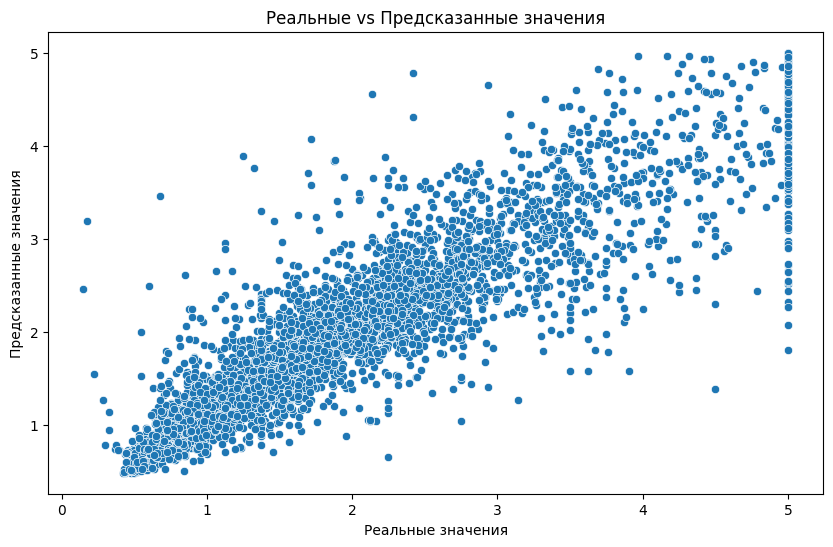

In [46]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_loaded)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs Предсказанные значения")
plt.show()